In [9]:
import matplotlib.pyplot as plt
import rebound
import numpy as np
%matplotlib inline
plt.style.use('paper')

In [10]:
mu=3e-6       # m_1/m_star
j, k = 20, 1     # j:j-k MMR
pomega = np.pi/2 # pericenter of outer test particle
phi = 2*np.pi/3  # Angle of conjunction relative to pericenter (resonant angle)

n = 2*np.pi
n20 = n*(j-k)/j
dares = (j/(j-k))**(2/3)-1
deltan = 0.015

ec = 2*k/3/j
etilde = 0.3
e = etilde*ec
deltat = 2/3/n20 # time to move delta a in y at a rate delta v
tconj=j/k # ps[1].P = 1

In [15]:
def setup(t0=-deltat, theta=None): # make sim with sim.t = t0 (where conjunction always happens near t=0, use get_conjunction_time to get exact)
    sim = rebound.Simulation()
    sim.G = 4*np.pi**2
    sim.add(m=1)
    sim.add(m=mu, P=1, 
            l=pomega+phi+n*t0) # phi = l - pomega, so l = pomega+phi
    ps = sim.particles
    if theta is None:
        theta = pomega+phi+n20*t0
    sim.add(P=2*np.pi/(n20+deltan), e=etilde*ec, pomega=pomega, l=theta)
    sim.t = t0
    
    print('Hill radius separation:', sim.particles[1].l, (sim.particles[2].a-sim.particles[1].a)/(mu/3)**(1/3))
    return sim

In [16]:
tmin = -0.205*tconj
tmax = 0.215*tconj
sim = setup(t0=tmin)
ps = sim.particles
da0 = ps[2].a-ps[1].a
dr0 = ps[2].a*ps[2].e

Nout = 10000
x, y = np.zeros(Nout), np.zeros(Nout)
times = np.linspace(tmin, tmax, Nout)
for i, time in enumerate(times):
    sim.integrate(time)
    x[i] = ps[2].d - ps[1].d
    y[i] = np.arcsin((ps[1].x*ps[2].y - ps[1].y*ps[2].x)/ps[1].d/ps[2].d)

daf = ps[2].a-ps[1].a
drf = ps[2].a*ps[2].e

Hill radius separation: 3.0368728984701363 3.305697953098385


1.051554842030853 1.0526315789473684 0.36463361031723834


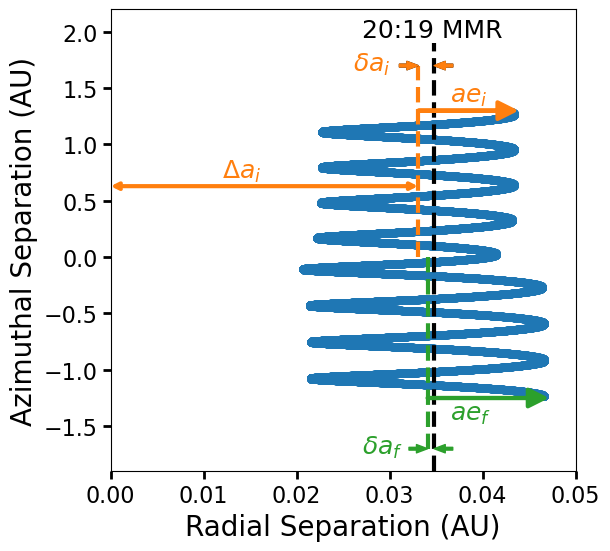

In [5]:
fig, ax = plt.subplots()
ax.plot(x, y, '.')
pi = ax.plot([da0, da0], [0, 1.7], linestyle='--')
pf = ax.plot([daf, daf], [0, -1.7], linestyle='--')
ax.plot((dares, dares), (-1.9, 1.9), color='k', linestyle='--', rasterized=True)

ax.annotate("", (da0+dr0, 1.3), (da0, 1.3), arrowprops={'shrinkA':0, 'shrinkB':0,'width':0.01, 'linewidth':3, 'color':pi[0].get_color()})
ax.annotate("", (daf+drf, -1.25), (daf, -1.25), arrowprops={'shrinkA':0, 'shrinkB':0,'width':0.01, 'linewidth':3, 'color':pf[0].get_color()})
ax.annotate("", (da0, 0.63), (0, 0.63), arrowprops={'arrowstyle':'<->','shrinkA':0, 'shrinkB':0,'linewidth':3, 'color':pi[0].get_color()})
ax.annotate("", (da0, 1.7), (da0-0.002, 1.7), arrowprops={'shrinkA':0, 'shrinkB':0, 'color':'black', 'headlength':8, 'headwidth':6, 'width':2})
ax.annotate("", (dares, 1.7), (dares+0.002, 1.7), arrowprops={'shrinkA':0, 'shrinkB':0, 'color':'black', 'headlength':8, 'headwidth':6, 'width':2})
ax.annotate("", (da0, 1.7), (da0-0.002, 1.7), arrowprops={'shrinkA':0, 'shrinkB':0, 'color':pi[0].get_color(), 'headlength':8, 'headwidth':6, 'width':2})
ax.annotate("", (dares, 1.7), (dares+0.002, 1.7), arrowprops={'shrinkA':0, 'shrinkB':0, 'color':pi[0].get_color(), 'headlength':8, 'headwidth':6, 'width':2})
ax.annotate("", (daf, -1.7), (daf-0.002, -1.7), arrowprops={'shrinkA':0, 'shrinkB':0, 'color':pf[0].get_color(), 'headlength':8, 'headwidth':6, 'width':2})
ax.annotate("", (dares, -1.7), (dares+0.002, -1.7), arrowprops={'shrinkA':0, 'shrinkB':0, 'color':pf[0].get_color(), 'headlength':8, 'headwidth':6, 'width':2})

ax.text(0.027, 1.95, '20:19 MMR', color='k', fontsize=18)
ax.text(da0-0.007, 1.65, r"$\delta a_i$", color=pi[0].get_color(), fontsize=18)
ax.text(daf-0.007, -1.75, r"$\delta a_f$", color=pf[0].get_color(), fontsize=18)
ax.text(0.012, 0.7, r'$\Delta a_i$', color=pi[0].get_color(), fontsize=18)
ax.text(0.0365, 1.38, r'$a e_i$', color=pi[0].get_color(), fontsize=18)
ax.text(0.0365, -1.45, r'$a e_f$', color=pf[0].get_color(), fontsize=18)
ax.set_xlabel('Radial Separation (AU)')
ax.set_ylabel('Azimuthal Separation (AU)')
ax.set_xlim([0, 0.05])
ax.set_ylim([-1.9, 2.2])
print(ps[2].P, 2*np.pi/n20, ps[2].e/ec)
fig.savefig('encounter.pdf', bbox_inches='tight')

# setup conjunction at lambda_conj = 0. lambda_conj - pomega = -pomega

In [3]:
da = 1e-6
pomega = np.pi/3
sim = rebound.Simulation()
sim.G = 4*np.pi**2
sim.add(m=1)
sim.add(a=1)
sim.add(a=1+da, e=da/10, pomega=pomega, M=-pomega)
ps = sim.particles
n = ps[1].n

In [4]:
Nout = 1000
times = np.linspace(0, 10, Nout)
x, y = np.zeros(Nout), np.zeros(Nout)
for i, t in enumerate(times):
    sim.integrate(t)
    R = np.array([[np.cos(n*t), np.sin(n*t)], [-np.sin(n*t), np.cos(n*t)]])
    x[i], y[i] = np.matmul(R, np.array([ps[2].x, ps[2].y]))
    
xpred = da - ps[2].e*np.cos(n*times - ps[2].pomega)
ypred = (ps[2].n-ps[1].n)*times + 2*ps[2].e*np.sin(n*times - ps[2].pomega)

(0.0, 1.2e-06)

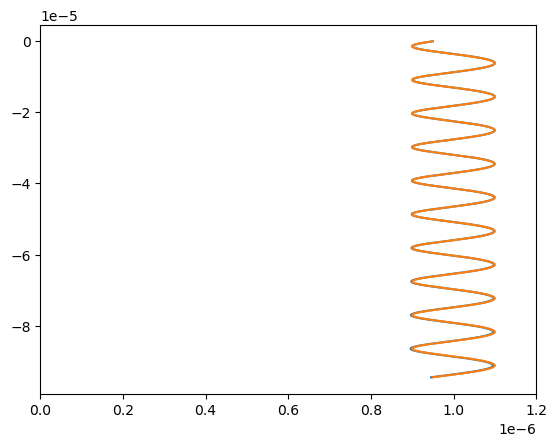

In [5]:
fig, ax = plt.subplots()
ax.plot(x-1, y)
ax.plot(xpred, ypred)
ax.set_xlim([0, 1.2*da])

In [6]:
j, k = 100, 1
n20 = 2*np.pi*(j-k)/j
ec = 2*k/3/j
print(ec)
deltan = ec/1000
pomega = np.pi/3
sim = rebound.Simulation()
sim.G = 4*np.pi**2
sim.add(m=1)
sim.add(P=1)
sim.add(P=2*np.pi/(n20+deltan), e=ec/10, pomega=pomega, f=-pomega)
ps = sim.particles
n = ps[1].n

0.006666666666666666


In [7]:
n20 = 2*np.pi*(j-k)/j
n20+deltan, ps[2].n

(6.220360120774457, 6.220360120774459)

In [8]:
deltan

6.666666666666667e-06

In [9]:
ps[1].y, ps[2].y

(0.0, 0.0)

In [10]:
Nout = 7000
Pconj = 2*np.pi/(n20-ps[1].n)
times = np.linspace(0, Pconj, Nout)
phi = np.zeros(Nout)
for i, t in enumerate(times):
    sim.integrate(t)
    phi[i] = j*ps[2].l - (j-k)*ps[1].l - k*ps[2].pomega

In [11]:
2/3*deltan*times[-1], np.mod(phi[-1]-phi[0], 2*np.pi)

(-0.00044444444444444696, 6.216518649657559)

In [12]:
ps[1].y, ps[2].y

(9.306252296559236e-11, -0.000671371724168101)

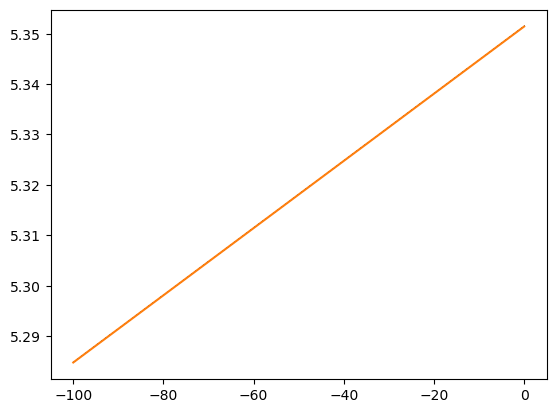

In [13]:
fig, ax = plt.subplots()
ax.plot(times, np.mod(phi, 2*np.pi), ',')
ax.plot(times, np.mod(phi[0]+2/3*deltan*times/ec, 2*np.pi))

In [14]:
mu=1e-10
j, k = 100, 1
n20 = 2*np.pi*(j-k)/j
ec = 2*k/3/j
etilde = 1/10
print(ec)
deltan = 0
pomega = 0.00
sim = rebound.Simulation()
sim.G = 4*np.pi**2
sim.add(m=1)
sim.add(m=mu, P=1)
ps = sim.particles
n = ps[1].n
deltat = 2/3/n # time to move delta a in y at a rate delta v
deltan0 = 3/2*n*ec # delta n at resonance
delta_lambda = ec # deltan0*deltat, i.e. difference in lambda to position inner at l=0, and outer at l=delta_lambda
sim.add(P=2*np.pi/(n20+deltan), e=etilde*ec, pomega=pomega, M=-pomega+delta_lambda) # use f instead of lambda to be exact loc
n2 = ps[2].n
print(n2)

0.006666666666666666
6.220353454107788


In [15]:
delta_lambda

0.006666666666666666

In [16]:
Nout = 1000
times = np.linspace(0, 2*deltat, Nout)
x, y = np.zeros(Nout), np.zeros(Nout)
vx, vy = np.zeros(Nout), np.zeros(Nout)
for i, t in enumerate(times):
    sim.integrate(t)
    R = np.array([[np.cos(n*t), np.sin(n*t)], [-np.sin(n*t), np.cos(n*t)]])
    x[i], y[i] = np.matmul(R, np.array([ps[2].x, ps[2].y]))-[1, 0] # subtract (1,0) for (x,y) of planet 1 in rotated frame
    vx[i], vy[i] = np.matmul(R, np.array([ps[2].vx, ps[2].vy]))-[0, ps[1].v] # rotate to put p1 on x axis, then sub v1 all in y dir
    Fx = - sim.G*mu*x[i]/(x[i]**2 + y[i]**2)**(3/2)
    Fy = - sim.G*mu*y[i]/(x[i]**2 + y[i]**2)**(3/2)

xpred = ec - ps[2].e*np.cos(n*times - ps[2].pomega)
ypred = (ps[2].n-ps[1].n)*times + 2*ps[2].e*np.sin(n*times - ps[2].pomega) + delta_lambda
vxpred = n*etilde*ec*np.sin(n*times-pomega)
vypred = -deltan0 + 2*n*etilde*ec*np.cos(n*times-pomega)
n2f = ps[2].n    
(n2f-n2)/n2

6.650827659505835e-07

In [17]:
-deltan0, ps[2].n-ps[1].n

(-0.06283185307179585, -0.0628277160219195)

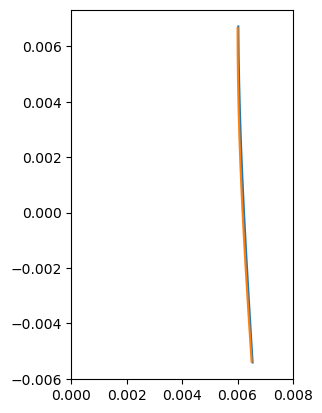

In [18]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.plot(xpred, ypred)
ax.set_xlim([0, 1.2*ec])
ax.set_aspect('equal')

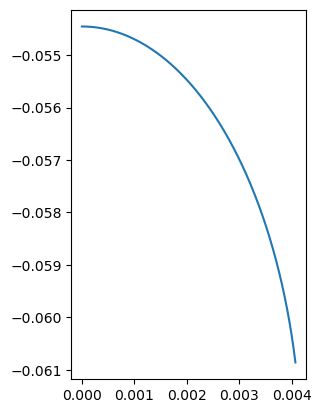

In [19]:
fig, ax = plt.subplots()
ax.plot(vxpred, vypred)
ax.set_aspect('equal')

# phi (lambda_conj - pomega) is fixed at x = 0. We therefore set pomega = -phi. We set t_initial to some multiple of the time it takes for planets to move by delta a in longitude, and therefore set initial lambdas as -n_i*t_init

In [20]:
mu=1e-10
j, k = 100, 1
n = 2*np.pi
n20 = n*(j-k)/j
deltan0 = n-n20
ec = 2*k/3/j
etilde = 1/10
e = etilde*ec
deltat = 2/3/n20 # time to move delta a in y at a rate delta v
Ndeltat = 3
pomega = 0.
phi = 1.5
sim = rebound.Simulation()
sim.G = 4*np.pi**2
sim.add(m=1)
sim.add(m=0, P=1, l=-n*Ndeltat*deltat)
ps = sim.particles
sim.add(P=2*np.pi/(n20+deltan), e=etilde*ec, pomega=-phi, l=-n20*Ndeltat*deltat) # use f instead of lambda to be exact loc
n2 = ps[2].n
print(n2)

6.220353454107784


In [21]:
Nout = 1000
times = np.linspace(-Ndeltat*deltat, Ndeltat*deltat, Nout)
sim.t = times[0]
x, y = np.zeros(Nout), np.zeros(Nout)
vx, vy = np.zeros(Nout), np.zeros(Nout)
for i, t in enumerate(times):
    sim.integrate(t)
    R = np.array([[np.cos(n*t), np.sin(n*t)], [-np.sin(n*t), np.cos(n*t)]])
    x[i], y[i] = np.matmul(R, np.array([ps[2].x, ps[2].y]))-[1, 0] # subtract (1,0) for (x,y) of planet 1 in rotated frame
    vx[i], vy[i] = np.matmul(R, np.array([ps[2].vx, ps[2].vy]))-[0, ps[1].v] # rotate to put p1 on x axis, then sub v1 all in y dir
    Fx = - sim.G*mu*x[i]/(x[i]**2 + y[i]**2)**(3/2)
    Fy = - sim.G*mu*y[i]/(x[i]**2 + y[i]**2)**(3/2)

xpred = ec - e*np.cos(n*times + phi) # cos M = cos lambda - pomega = cos nt + phi since pomega = -phi
ypred = -deltan0*times + 2*e*np.sin(n*times + phi)
xdotpred = n*e*np.sin(n*times-pomega)
ydotpred = -deltan0 + 2*n*e*np.cos(n*times-pomega)
n2f = ps[2].n    
(n2f-n2)/n2

2.8557168857135985e-16

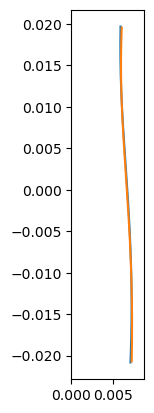

In [22]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.plot(xpred, ypred)
ax.set_xlim([0, 1.2*ec*(1+etilde)])
ax.set_aspect('equal')

# F dot dl doesn't (?) work in the rotating frame, because it looks like we just move through a length $\sim \Delta a$, where in reality in the non-rotating frame we're moving over a distance $\sim \Delta a/ e_c \sim a$. Works perfectly in non-rotating frame

symmetric $\Delta t$ around conjunction works well to within 1%

In [23]:
mu=1e-10
j, k = 10, 1
n = 2*np.pi
n20 = n*(j-k)/j
deltan = 0
n2_init = n20 + deltan
deltan0 = n-n20
ec = 2*k/3/j
etilde = 1/10
e = etilde*ec
deltat = 2/3/n20 # time to move delta a in y at a rate delta v
Ndeltat = 4
pomega = 0.
phi = 0.1
sim = rebound.Simulation()
sim.G = 4*np.pi**2
sim.add(m=1)
sim.add(m=mu, P=1, 
        l=-n*Ndeltat*deltat)
ps = sim.particles
sim.add(P=2*np.pi/(n2_init), e=etilde*ec, pomega=-phi, l=-n20*Ndeltat*deltat) # use f instead of lambda to be exact loc
ec

0.06666666666666667

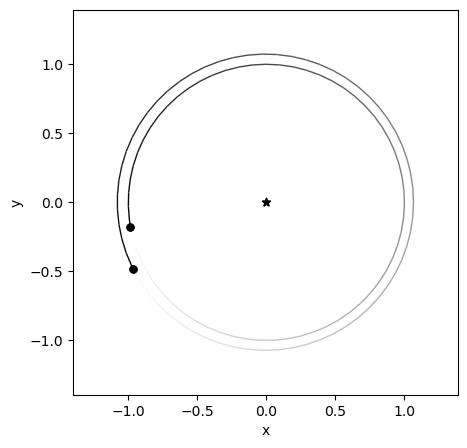

In [24]:
rebound.OrbitPlot(sim)

In [25]:
mu=1e-10
j, k = 10, 1
n = 2*np.pi
n20 = n*(j-k)/j
deltan = 0
n2_init = n20 + deltan
deltan0 = n-n20
ec = 2*k/3/j
etilde = 1/10
e = etilde*ec
deltat = 2/3/n20 # time to move delta a in y at a rate delta v
Ndeltat = 4
pomega = 0.
phi = 0.1
sim = rebound.Simulation()
sim.G = 4*np.pi**2
sim.add(m=1)
sim.add(m=mu, P=1, 
        l=-n*Ndeltat*deltat)
ps = sim.particles
sim.add(P=2*np.pi/(n2_init), e=etilde*ec, pomega=-phi, l=-n20*Ndeltat*deltat) # use f instead of lambda to be exact loc
ec

0.06666666666666667

In [26]:
Nout = 10000
times = np.linspace(-Ndeltat*deltat,Ndeltat*deltat, Nout)
sim.t = times[0]
x, y = np.zeros(Nout), np.zeros(Nout)
vx, vy = np.zeros(Nout), np.zeros(Nout)
n2 = np.zeros(Nout)
integrand = np.zeros(Nout)
for i, t in enumerate(times):
    sim.integrate(t)
    R = np.array([[np.cos(n*t), np.sin(n*t)], [-np.sin(n*t), np.cos(n*t)]])
    x[i], y[i] = np.matmul(R, np.array([ps[2].x, ps[2].y]))-[1, 0] # subtract (1,0) for (x,y) of planet 1 in rotated frame
    Fx = - sim.G*mu*x[i]/(x[i]**2 + y[i]**2)**(3/2)
    Fy = - sim.G*mu*y[i]/(x[i]**2 + y[i]**2)**(3/2)
    n2[i] = ps[2].n
    dx = ps[2].x - ps[1].x
    dy = ps[2].y - ps[1].y
    integrand[i] = (dx*ps[2].vx + dy*ps[2].vy)/(dx**2 + dy**2)**(3/2)
xpred = ec - e*np.cos(n*times + phi) # cos M = cos lambda - pomega = cos nt + phi since pomega = -phi
ypred = -deltan0*times + 2*e*np.sin(n*times + phi)
xdotpred = n*e*np.sin(n*times+phi)
ydotpred = -deltan0 + 2*n*e*np.cos(n*times+phi)
dn = 3*mu*(xpred*xdotpred + ypred*ydotpred)/(xpred**2 + ypred**2)**(3/2)
dn2 = 3*mu*integrand
dt = (times[-1]-times[0])/Nout
dn = dn.sum()*dt
dn2 = dn2.sum()*dt
(n2[-1]-n2[0])/n2[0], dn2

(1.2443159214068886e-09, 1.161043253739266e-09)

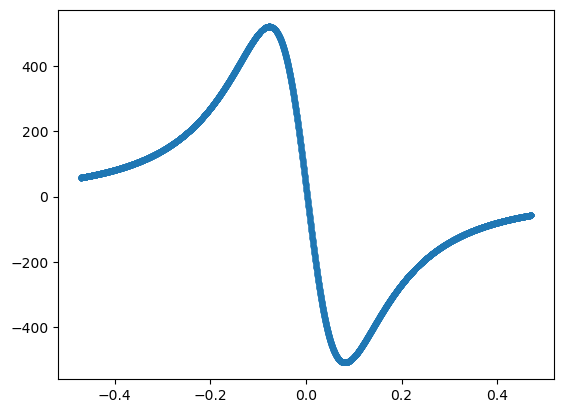

In [27]:
fig, ax = plt.subplots()
ax.plot(times, integrand, '.')

(0.0, 0.08800000000000001)

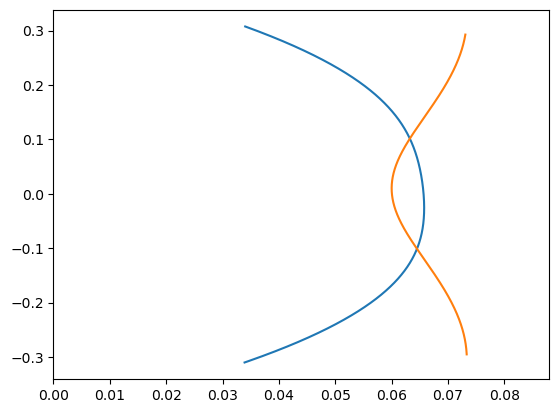

In [28]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.plot(xpred, ypred)
ax.set_xlim([0, 1.2*ec*(1+etilde)])
#ax.set_aspect('equal')

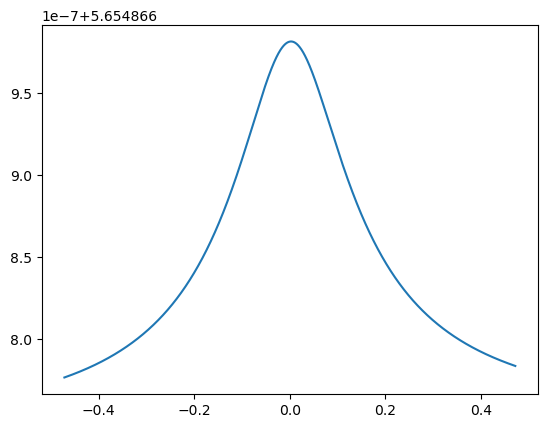

In [29]:
fig, ax = plt.subplots()
ax.plot(times, n2)

In [30]:
t = times[-1]
n*etilde*ec*np.sin(n*t-pomega), -deltan0 + 2*n*etilde*ec*np.cos(n*t-pomega)

(0.007442694189524293, -0.7107613021699826)

In [2]:
def run(mu=1e-15, j=1000, k=1, etilde=0.1, phi=0.1):
    n = 2*np.pi
    n20 = n*(j-k)/j
    deltan0 = n-n20
    deltan = 0
    n2_init = n20 + deltan

    ec = 2*k/3/j
    e = etilde*ec
    deltat = 2/3/n20 # time to move delta a in y at a rate delta v
    Ndeltat = 10
    pomega = 0.
    sim = rebound.Simulation()
    sim.G = 4*np.pi**2
    sim.add(m=1)
    sim.add(m=mu, P=1, l=-n*Ndeltat*deltat)
    sim.add(P=2*np.pi/(n20+deltan), e=e, pomega=-phi, l=-n20*Ndeltat*deltat) # use f instead of lambda to be exact loc
    ps = sim.particles

    sim.t = -Ndeltat*deltat
    sim.integrate(Ndeltat*deltat)
    
    return (ps[2].n-n2_init)/n2_init

In [32]:
run(mu=1e-20)

2.6884902212348714e-15

In [33]:
%%time
mus = np.logspace(-15, -20, 100)
delta = [run(mu=mu) for mu in mus]

CPU times: user 52.7 ms, sys: 2.82 ms, total: 55.5 ms
Wall time: 64.5 ms


Text(0, 0.5, '$\\Delta n/n$')

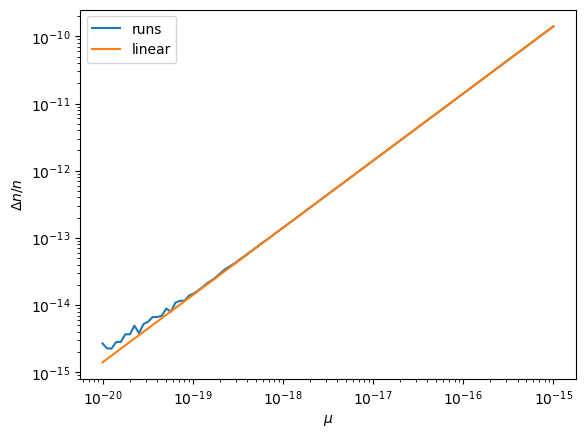

In [34]:
fig, ax = plt.subplots()
ax.loglog(mus, delta, label='runs')
ax.loglog(mus, delta[0]*mus/mus[0], label='linear')
ax.legend()
ax.set_xlabel('$\mu$')
ax.set_ylabel('$\Delta n/n$')

In [35]:
%%time
etildes = np.logspace(-4, -1, 100)
delta = [run(etilde=etilde) for etilde in etildes]

CPU times: user 40.5 ms, sys: 1.27 ms, total: 41.8 ms
Wall time: 40.7 ms


Text(0, 0.5, '$\\Delta n/n$')

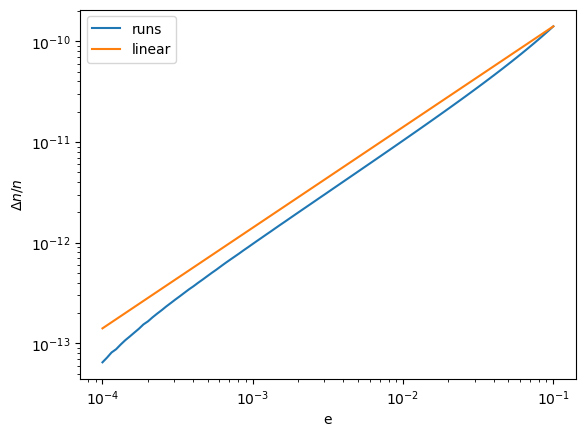

In [36]:
fig, ax = plt.subplots()
ax.loglog(etildes, delta, label='runs')
ax.loglog(etildes, delta[-1]*etildes/etildes[-1], label='linear')
ax.legend()
ax.set_xlabel('e')
ax.set_ylabel('$\Delta n/n$')

In [37]:
%%time
js = np.int64(np.logspace(2,4,100))
delta = [run(j=j, k=2) for j in js]

CPU times: user 54 ms, sys: 2.49 ms, total: 56.5 ms
Wall time: 63.8 ms


Text(0, 0.5, '$\\Delta n/n$')

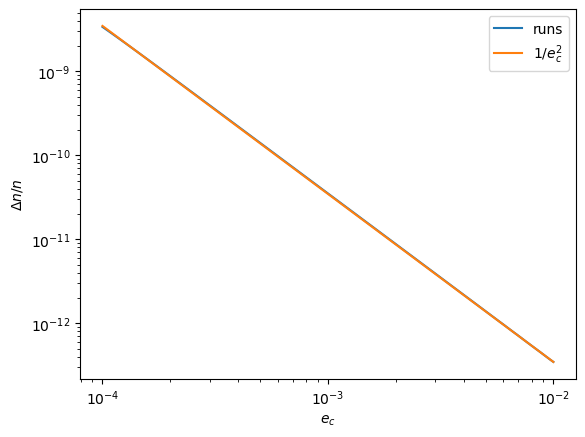

In [38]:
fig, ax = plt.subplots()
ax.loglog(1/js, delta, label='runs')
ax.loglog(1/js, delta[0]*(js[0]/js)**(-2), label='1/$e_c^2$')
ax.legend()
ax.set_xlabel('$e_c$')
ax.set_ylabel('$\Delta n/n$')

# k=2

In [37]:
%%time
etildes = np.logspace(-2, -1, 100)
delta1 = np.array([run(mu=1e-6, j=5, k=2, etilde=etilde, phi=np.pi/2+0.5) for etilde in etildes])

CPU times: user 75.9 ms, sys: 3.53 ms, total: 79.4 ms
Wall time: 78.4 ms


Text(0, 0.5, '$\\Delta n/n$')

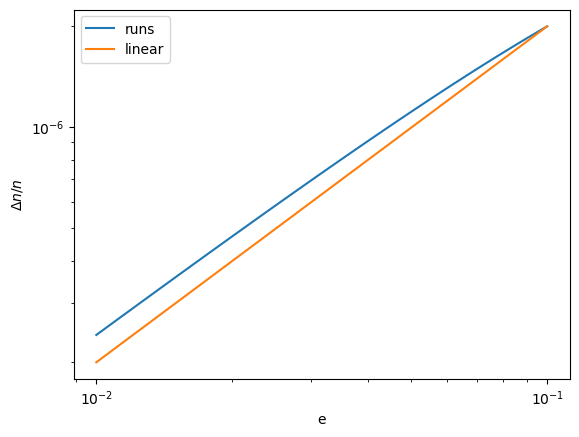

In [38]:
fig, ax = plt.subplots()
ax.loglog(etildes, delta1, label='runs')
ax.loglog(etildes, delta1[-1]*etildes/etildes[-1], label='linear')
ax.legend()
ax.set_xlabel('e')
ax.set_ylabel('$\Delta n/n$')

In [39]:
%%time
delta2 = np.array([run(mu=1e-6, j=5, k=2, etilde=etilde, phi=3*np.pi/2+0.5) for etilde in etildes])

CPU times: user 78.3 ms, sys: 3.04 ms, total: 81.3 ms
Wall time: 78.7 ms


Text(0, 0.5, '$\\Delta n/n$')

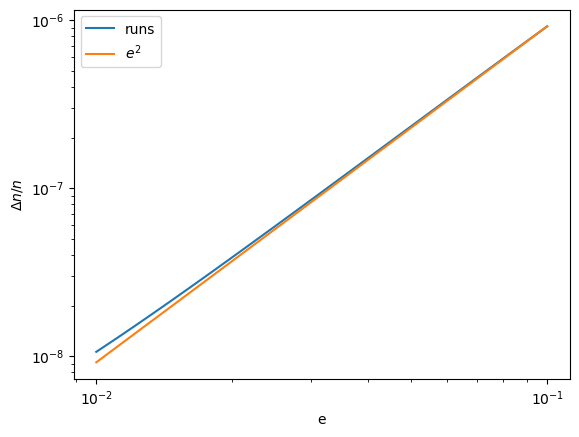

In [40]:
fig, ax = plt.subplots()
ax.loglog(etildes, np.abs(delta1+delta2), label='runs')
ax.loglog(etildes, np.abs(delta1+delta2)[-1]*(etildes/etildes[-1])**2, label='$e^2$')
ax.legend()
ax.set_xlabel('e')
ax.set_ylabel('$\Delta n/n$')

(3e-09, 5e-06)

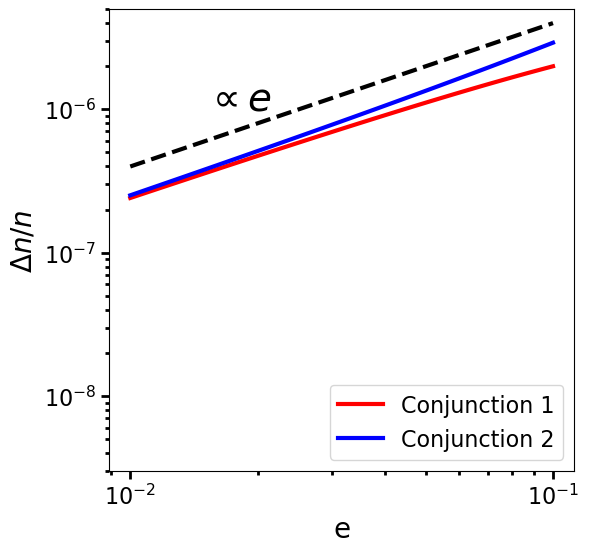

In [70]:
plt.style.use('/Users/dtamayo/.matplotlib/paper.mplstyle')
fig, ax = plt.subplots()
ax.loglog(etildes, delta1, color='r', label='Conjunction 1')
ax.loglog(etildes, np.abs(delta2), color='b', label='Conjunction 2')
ax.loglog(etildes, 2*delta1[-1]*etildes/etildes[-1], color='k', linestyle='--')
#ax.loglog(etildes, np.abs(delta1+delta2), color='g', label='Conjunction 1 + 2')
#ax.loglog(etildes, 0.5*np.abs(delta1+delta2)[-1]*(etildes/etildes[-1])**2, color='k', linestyle='--')
ax.text(0.015, 1e-6, r'$\propto e$', fontsize=28)
#ax.text(0.04, 5e-8, r'$\propto e^2$', fontsize=28)
ax.legend(loc='lower right')
ax.set_xlabel('e')
ax.set_ylabel('$\Delta n/n$')
ax.set_ylim([3e-9, 5e-6])

In [1219]:
%%time
ns = np.int64(np.logspace(2,4,100))
delta = [run(j=2*n+1, k=2, phi=np.pi/2+0.1) for n in ns]

CPU times: user 60.6 ms, sys: 4.35 ms, total: 64.9 ms
Wall time: 61.2 ms


In [1216]:
mu=1e-10
j, k = 101, 2
n = 2*np.pi
n20 = n*(j-k)/j
deltan = 0
n2_init = n20 + deltan
deltan0 = n-n20
ec = 2*k/3/j
etilde = 1/10
e = etilde*ec
deltat = 2/3/n20 # time to move delta a in y at a rate delta v
Ndeltat = 1
pomega = 0.
phi = np.pi/2+0.1
sim = rebound.Simulation()
sim.G = 4*np.pi**2
sim.add(m=1)
sim.add(m=mu, P=1, 
        l=-n*Ndeltat*deltat)
ps = sim.particles
sim.add(P=2*np.pi/(n2_init), e=etilde*ec, pomega=-phi, l=-n20*Ndeltat*deltat) # use f instead of lambda to be exact loc
ec

0.0132013201320132

In [1217]:
Nout = 10000
times = np.linspace(-Ndeltat*deltat,Ndeltat*deltat, Nout)
sim.t = times[0]
x, y = np.zeros(Nout), np.zeros(Nout)
vx, vy = np.zeros(Nout), np.zeros(Nout)
n2 = np.zeros(Nout)
integrand = np.zeros(Nout)
for i, t in enumerate(times):
    sim.integrate(t)
    R = np.array([[np.cos(n*t), np.sin(n*t)], [-np.sin(n*t), np.cos(n*t)]])
    x[i], y[i] = np.matmul(R, np.array([ps[2].x, ps[2].y]))-[1, 0] # subtract (1,0) for (x,y) of planet 1 in rotated frame
    Fx = - sim.G*mu*x[i]/(x[i]**2 + y[i]**2)**(3/2)
    Fy = - sim.G*mu*y[i]/(x[i]**2 + y[i]**2)**(3/2)
    n2[i] = ps[2].n
    dx = ps[2].x - ps[1].x
    dy = ps[2].y - ps[1].y
    integrand[i] = (dx*ps[2].vx + dy*ps[2].vy)/(dx**2 + dy**2)**(3/2)
xpred = ec - e*np.cos(n*times + phi) # cos M = cos lambda - pomega = cos nt + phi since pomega = -phi
ypred = -deltan0*times + 2*e*np.sin(n*times + phi)
xdotpred = n*e*np.sin(n*times+phi)
ydotpred = -deltan0 + 2*n*e*np.cos(n*times+phi)
dn = 3*mu*(xpred*xdotpred + ypred*ydotpred)/(xpred**2 + ypred**2)**(3/2)
dn2 = 3*mu*integrand
dt = (times[-1]-times[0])/Nout
dn = dn.sum()*dt
dn2 = dn2.sum()*dt
(n2[-1]-n2[0])/n2[0], dn2

(1.9578233048755233e-07, 1.931734040552413e-07)

In [1053]:
def run_gen(mu=1e-15, j=1000, k=1, etilde=0.1, phi=0.1):
    n = 2*np.pi
    n20 = n*(j-k)/j
    deltan0 = n-n20
    deltan = 0
    n2_init = n20 + deltan

    ec = 2*k/3/j
    e = etilde*ec
    deltat = 2/3/n20 # time to move delta a in y at a rate delta v
    Ndeltat = 10
    pomega = 0.
    sim = rebound.Simulation()
    sim.G = 4*np.pi**2
    sim.add(m=1)
    sim.add(m=mu, P=1, l=-n*Ndeltat*deltat)
    sim.add(P=2*np.pi/(n20+deltan), e=e, pomega=-phi, l=-n20*Ndeltat*deltat) # use f instead of lambda to be exact loc
    ps = sim.particles

    sim.t = -Ndeltat*deltat
    sim.integrate(Ndeltat*deltat)
    
    return (ps[2].n-n2_init)/n2_init

In [294]:
t = times[-1]
n*etilde*ec*np.sin(n*t-pomega), -deltan0 + 2*n*etilde*ec*np.cos(n*t-pomega)

(-0.0009853608428492823, -0.05468936515001328)

In [295]:
vx[-1], vy[-1]

(0.042764481115199884, -0.017095408348485108)

In [257]:
(ps[1].v-ps[2].v)/ps[1].v, (ps[1].n-ps[2].n)/n

(0.0033396340919924893, 0.00999999999999952)

In [258]:
n, 2*np.pi

(6.283185307179586, 6.283185307179586)

In [259]:
n2/n, (j-k)/j

(0.9900000000000004, 0.99)

In [260]:
ps[2].a-ps[1].a, ec

(0.006722720619007916, 0.006666666666666666)

In [261]:
deltat

0.10610329539459688

In [262]:
(ps[2].a-ps[1].a)/(ps[1].v-ps[2].v)

0.320380672861947

In [263]:
ec

0.006666666666666666

In [264]:
deltan0, ps[1].n-ps[2].n

(0.06283185307179585, 0.06283185307179284)

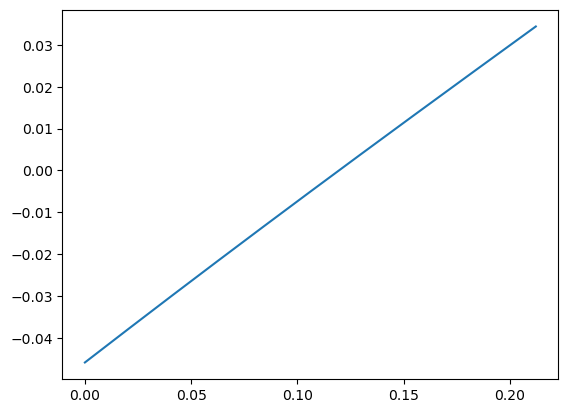

In [267]:
fig, ax = plt.subplots()
ax.plot(times, vx)
#ax.plot(xpred, ypred)
#ax.set_xlim([0, 1.2*ec])
#ax.set_aspect('equal')

In [36]:
deltat

0.10610329539459688

In [39]:
ec/.02

0.3333333333333333